In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Parseo de columnas

In [187]:
df = pd.read_csv("Entrenamieto_ECI_2020.csv", dtype={
                    'Region': 'category', 
                    'Territory': 'category',
                    'Pricing, Delivery_Terms_Quote_Appr': 'bool',
                    'Pricing, Delivery_Terms_Approved': 'bool',
                    'Bureaucratic_Code_0_Approval': 'bool',
                    'Bureaucratic_Code_0_Approved': 'bool',
                    'Submitted_for_Approval': 'bool', 
                    'Bureaucratic_Code': 'category',
                    'Source ': 'category',
                    'Billing_Country': 'category',
                    'Account_Name': 'category',
                    'Opportunity_Name': 'category',
                    'Opportunity_ID': 'int',
                    'Sales_Contract_No': 'category',
                    'Account_Owner': 'category',      
                    'Opportunity_Owner': 'category', 
                    'Account_Type': 'category', 
                    'Opportunity_Type': 'category',     
                    'Quote_Type': 'category', 
                    'Delivery_Terms': 'category',
                    'Brand': 'category',
                    'Product_Type': 'category',
                    'Size': 'category',
                    'Product_Category_B': 'category',    
                    'Currency': 'category',
                    'Last_Modified_By': 'category',    
                    'Product_Family': 'category',    
                    'Product_Name': 'category',
                    'ASP_Currency': 'category',    
                    'ASP_(converted)_Currency': 'category',    
                    'Delivery_Quarter': 'category',  
                    'Total_Amount_Currency': 'category',
                    'Total_Taxable_Amount_Currency': 'category',
                    'Stage': 'category',
                    'Prod_Category_A': 'category'})

df["Price"] = pd.to_numeric(df['Price'], errors='coerce',)
#No pude convertir la columna 'Sales_Contract_No' a int. Ademas es una variable categorica al igual 
#que 'Opportunity_ID'
#pd.to_numeric(df['Sales_Contract_No'], errors='coerce',downcast='integer')

df['Actual_Delivery_Date'] = pd.to_datetime(df['Actual_Delivery_Date'])
df['Last_Activity'] = pd.to_datetime(df['Last_Activity'])

df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date']\
                                            .apply(lambda x: x.replace('/', '')), format='%m%d%Y')
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date']\
                                            .apply(lambda x: x.replace('/', '')), format='%m%d%Y')
df['Quote_Expiry_Date'] = pd.to_datetime(df['Quote_Expiry_Date']\
                                            .apply(lambda x: x.replace('/', '')), format='%m%d%Y')
df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date']\
                                            .apply(lambda x: x.replace('/', '')), format='%m%d%Y')
df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date']\
                                            .apply(lambda x: x.replace('/', '')), format='%m%d%Y')

df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date']\
                                            .apply(lambda x: x.replace('/', '')), format='%m%d%Y')
df['Month'] = pd.to_datetime(df['Month']\
                          .apply(lambda x: x.replace(' - ', '')), format='%Y%m')


df.describe()


,ID,Opportunity_ID,Price,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,356.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,5335.940225,0.320323,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,3324.723809,0.074717,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.200000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,2448.500000,0.260000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,5306.000000,0.307500,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,7698.000000,0.370000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,12803.000000,0.560000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


# Preguntas
#¿Cual es la distribucion de la cantidad de contratos en las regiones?
#¿Y dentro de cada región?
#¿Cual es la región con mas contratos?
#¿Cual es la región con la mayor tasa de contratos con el estado "Closed Won"?
#¿Cual es la distribucion de los valores de la variable Stage segun la región?
#¿Cual es la cantidad de contratos, y como es su distribucion con respecto a su cantidad de items?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  category      
 2   Territory                           16947 non-null  category      
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  bool          
 4   Pricing, Delivery_Terms_Approved    16947 non-null  bool          
 5   Bureaucratic_Code_0_Approval        16947 non-null  bool          
 6   Bureaucratic_Code_0_Approved        16947 non-null  bool          
 7   Submitted_for_Approval              16947 non-null  bool          
 8   Bureaucratic_Code                   16947 non-null  category      
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [14]:
#Veamos la cantidad de datos no nulos por columna, zeros, none, y nulos
df2 = df.count().to_frame()

df2 = df2.rename(columns = {0:'count'})
df2['Null'] = df.isna().sum()
df2['zeros'] = 0
df2['zeros'] += df.select_dtypes(include=['number']).eq(0).sum()
df2['None'] = df.eq('None').sum()
df2

G:\Programas\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,count,Null,zeros,None
ID,16947,0,0.0,0
Region,16947,0,NaN,0
Territory,16947,0,NaN,4999
"Pricing, Delivery_Terms_Quote_Appr",16947,0,NaN,0
"Pricing, Delivery_Terms_Approved",16947,0,NaN,0
Bureaucratic_Code_0_Approval,16947,0,NaN,0
Bureaucratic_Code_0_Approved,16947,0,NaN,0
Submitted_for_Approval,16947,0,NaN,0
Bureaucratic_Code,16947,0,NaN,0
Account_Created_Date,16947,0,NaN,0


Las columnas "Actual_Delivery_Date", "Last_Activity" a primeras no aportan alguna informacion que pueda servir ya que no tienen registros.

## Cantidad de valores no nulos en variables numéricas

Text(0.5, 0, 'columnas numéricas')

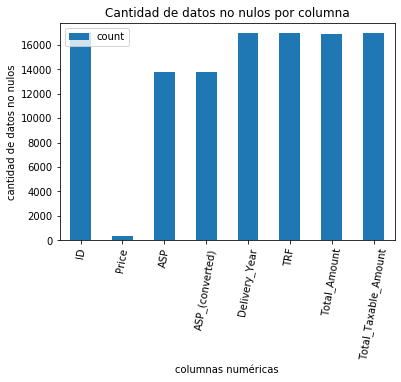

In [6]:
#Obtengo una lista de las columnas numéricas
columns_with_numbers = df.select_dtypes(include=['number']).columns.to_list()
df2_with_numbers = df2.loc[columns_with_numbers,'count'].to_frame()

df2_with_numbers.plot(kind= 'bar',rot=80, title='Cantidad de datos no nulos por columna')
ax= plt.gca()
ax.set_ylabel('cantidad de datos no nulos')
ax.set_xlabel('columnas numéricas')

## Variable Price


356


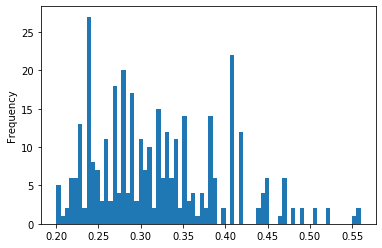

In [226]:
print( len(df.Price) - df.Price.isnull().sum() )
#Solo tiene 356 datos validos, un 2.10%
df['Price'].plot(kind='hist', bins=70) 

Text(0, 0.5, 'Densidad')

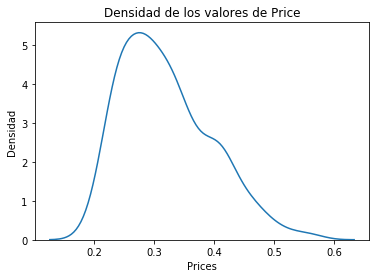

In [227]:
g = sns.distplot(df['Price'], hist=False)
g.set_title("Densidad de los valores de Price")
g.set_xlabel("Prices")
g.set_ylabel("Densidad")

## Cantidad de valores "None" en variables categóricas

In [239]:
columns_category = df.select_dtypes(include=['category']).columns.to_list()
#filtro las columnas que estan completas
df2_category = df2.loc[columns_category and (df2['None'] != 0) ,'None'].to_frame()
#Convierto las cantidades en porcentajes
df2_category = df2_category / 16947 * 100
df2_category

,None
Territory,29.497846
Source,56.039417
Billing_Country,0.159320
Sales_Contract_No,41.145926
Account_Type,0.660884
Brand,93.886824
Product_Type,94.028442
Size,94.217266
Product_Category_B,93.987136
Currency,94.718829


Text(0.5, 0, 'columnas categóricas')

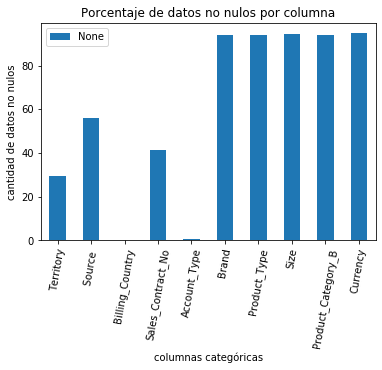

In [240]:
df2_category.plot(kind= 'bar', rot= 80, title='Porcentaje de datos no nulos por columna')
ax= plt.gca()
ax.set_ylabel('cantidad de datos no nulos')
ax.set_xlabel('columnas categóricas')

Las columnas "Brand", "Product_Type", "Size", "Product_category_B" y "Currency" tienen mas del 90 % de registros definidos con "None".
Lo mismo sucede con "Territory", "Source", y "Sales_contract_No" pero en menor medida.
#Podremos inferir algunos registros de territory consultando la columna "Region".
#Que "Sales_contract_No" tenga 41.15% de "None", quiere decir que  hay cerca de la mitad de registros que no están al menos identificados con un numero de contrato.


## Cantidad de valores  "None" en variables categóricas

In [36]:
#Obtengo una lista de las variables categóricas
colums_category = df.select_dtypes(include=['category']).columns.to_list()
#filtro las columnas que tienen al menos un None
df2_category_with_none = df2.loc[colums_category and df2['None'] != 0,'None'].to_frame()
#Convierto las cantidades en porcentajes
df2_category_with_none = df2_category_with_none / len(df) * 100
df2_category_with_none

,None
Territory,29.497846
Source,56.039417
Billing_Country,0.159320
Sales_Contract_No,41.145926
Account_Type,0.660884
Brand,93.886824
Product_Type,94.028442
Size,94.217266
Product_Category_B,93.987136
Currency,94.718829


Text(0.5, 0, 'columnas')

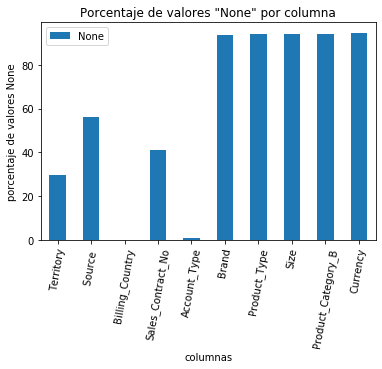

In [144]:
df2_category_with_none.plot(kind= 'bar', rot= 80, title='Porcentaje de valores "None" por columna')
ax= plt.gca()
ax.set_ylabel('porcentaje de valores None')
ax.set_xlabel('columnas')

## Contratos por regiones

In [45]:
df[['Region','Territory','Sales_Contract_No']].eq('None').sum() / len(df) * 100

Region                0.000000
Territory            29.497846
Sales_Contract_No    41.145926
dtype: float64

In [108]:
Regions = df[['Region','Sales_Contract_No']].groupby('Region').count()
Regions.Sales_Contract_No

Region
APAC           3262
Americas       3945
EMEA           4664
Japan          4892
Middle East     184
Name: Sales_Contract_No, dtype: int64

Text(0.5, 0, 'Regiones')

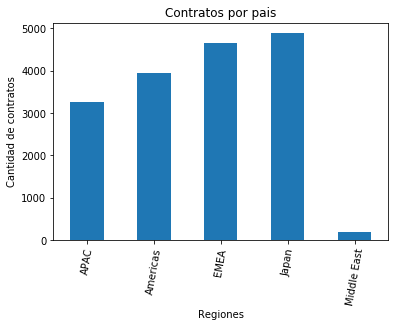

In [155]:
Regions.Sales_Contract_No.plot(kind= 'bar', rot= 80, title='Contratos por pais')
ax= plt.gca()
ax.set_ylabel('Cantidad de contratos')
ax.set_xlabel('Regiones')

## Contratos por Paises

In [114]:
df.Territory.value_counts()

None               4999
Germany            1682
NW America         1568
Australia          1208
India               809
                   ... 
Egypt                 1
Georgia               1
Solomon Islands       1
Slovenia              1
Czech Republic        1
Name: Territory, Length: 76, dtype: int64

Hay 4999 contratos que no tienen país definido. Tambien vemos que Japon tiene 681, pero en la tabla de Regiones, la Region 'Japan' tiene 4892 contratos.
Veamos cuales son las regiones de los contratos sin 'Territory' :

In [188]:
df['Regions with None'] = df['Territory'] == 'None'
Regions_with_None = df.loc[:,['Region','Regions with None']].groupby('Region').sum()
Regions_with_None

,Regions with None
Region,
APAC,0.0
Americas,571.0
EMEA,187.0
Japan,4211.0
Middle East,30.0


Si sumamos estos 4211 contratos de la Region 'Japan' con los 681 confirmados en la tabla de 'territory'
Nos quedan los 4892 que figuraban en la tabla de contratos por region
Por lo tanto, a los registros con Region Japan y valor 'None' en la columna 'territory' se lo cambiamos a 'Japan'.

In [208]:
df.loc[df.Territory.eq('None') & df.Region.eq('Japan') ,'Territory'] = 'Japan'
#Confirmemos consultando la tabla nuevamente
df['Regions with None'] = df['Territory'] == 'None'
Regions_with_None = df.loc[:,['Region','Regions with None']].groupby('Region').sum()
Regions_with_None

,Regions with None
Region,
APAC,0.0
Americas,571.0
EMEA,187.0
Japan,0.0
Middle East,30.0


In [216]:
Territories = df[['Territory','Sales_Contract_No']].groupby('Territory').count()
Territories_top10 = Territories['Sales_Contract_No'].nlargest(10)
Territories_top10

Territory
Japan          4892
Germany        1682
NW America     1568
Australia      1208
India           809
None            788
NE America      760
Netherlands     533
SE America      493
France          449
Name: Sales_Contract_No, dtype: int64

La mayor cantidad de contratos se concentran principalmente en Japan, seguido de Alemania, NW america
y Australia

Text(0.5, 0, 'Paises')

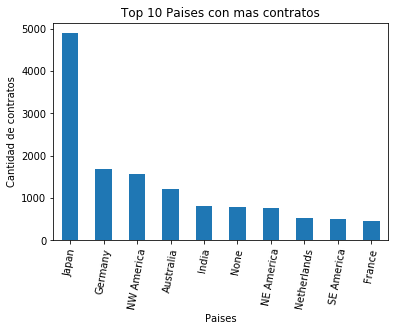

In [217]:
Territories_top10.plot(kind= 'bar', rot= 80, title='Top 10 Paises con mas contratos')
ax= plt.gca()
ax.set_ylabel('Cantidad de contratos')
ax.set_xlabel('Paises')

In [225]:
#Comparemos la cantidad de 'None' con el total segun su region, tambien sacamos el porcentaje.
Regions_with_None['Nro of contracts'] = Regions.Sales_Contract_No
Regions_with_None['Porcentage of None'] = Regions_with_None['Regions with None']   * 100       \
                                        / Regions.Sales_Contract_No
#Cambiamos el nombre de una columna para mejorar la visualizacion de la tabla
Regions_with_None = Regions_with_None.rename(columns= {'Regions with None':'Nro of None'})
Regions_with_None.reset_index()

,Region,Nro of None,Nro of contracts,Porcentage of None
0,APAC,0.0,3262,0.000000
1,Americas,571.0,3945,14.474018
2,EMEA,187.0,4664,4.009434
3,Japan,0.0,4892,0.000000
4,Middle East,30.0,184,16.304348


In [272]:
df['is closed won'] = df.Stage == 'Closed Won'
df.ID.value_counts()

6141     1
27384    1
21263    1
19212    1
25353    1
        ..
13676    1
28007    1
25958    1
19811    1
8196     1
Name: ID, Length: 16947, dtype: int64

## Columna Billing_Country

In [ ]:
## Algunos registros que no tienen pais designado en la columna 'Territory' podemos inferirlos por
# el pais en donde se emitió la factura, dada por la columna 'Billing_Country'

In [280]:
#Veamos si se cumple esto
df[['Billing_Country','Territory']]

,Billing_Country,Territory
0,Netherlands,None
1,Netherlands,None
2,United States,NW America
3,United States,NW America
4,United States,NW America
...,...,...
16942,Austria,Austria
16943,Austria,Austria
16944,Austria,Austria
16945,United States,NE America


In [287]:
#Veamos si tambien hay registros sin pais designado en la columna 'Billing_Country'
print( str(df.Billing_Country.eq('None').sum()) + ' registros con valor "None" ')
df.loc[df.Billing_Country.eq('None'),'Territory']

27 registros con valor "None" 


24                India
181             Tunisia
2613              India
3063              Japan
3071          Singapore
3091     United Kingdom
3579     United Kingdom
4200          Indonesia
7921            Germany
10278         Singapore
16144              None
16176       Philippines
16185         Indonesia
16186         Indonesia
16329         Singapore
16385          Cambodia
16451             India
16495             India
16617             India
16618             India
16628             India
16685             India
16710             India
16760             India
16832    United Kingdom
16833    United Kingdom
16836            Poland
Name: Territory, dtype: category
Categories (76, object): [Albania, Armenia, Australia, Austria, ..., UAE (Others), Ukraine, United Kingdom, Vietnam]

De estos 27 tambien podemos sacar el pais de la columna 'Territory', a excepcion de uno.

In [282]:
#Veamos cuantos registros hay sin pais designado tanto en 'Territory' como en 'Billing_Country'
df.loc[df.Billing_Country.eq('None'),'Territory'].eq('None').sum()

1

In [297]:
Territories_for_billing_countries = df.loc[df.Billing_Country.eq('None') ,'Territory']
df.loc[df.Billing_Country.eq('None') ,'Billing_Country'] = Territories_for_billing_countries


ValueError: Cannot set a Categorical with another, without identical categories